# Descriptor Wordcloud
Using text from the descriptor column, we'll create a word cloud to visualize the most common words that appear in the calls' descriptions. First, the below function will clean the descriptor data and return a list of words found in the column (excluding stopwords).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.collocations import *
from nltk import FreqDist
from nltk.probability import FreqDist

from wordcloud import WordCloud, STOPWORDS

In [3]:
df = pd.read_csv('nyc_311_initial_new.csv',index_col=0)

In [4]:
#Download nltk files
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ramtuptewar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ramtuptewar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ramtuptewar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
def clean_text(text):
    # Join all strings in text and separate them by whitespace
    joined_text = " ".join(text) 
    
    # Remove all characters that are not letters
    joined_text = re.sub('[^A-Za-z ]+', ' ', joined_text)
    
    # Tokenize the joined text into words
    words = word_tokenize(joined_text)
    
    # Create a set of stopwords to improve efficiency
    stop_words = set(stopwords.words('english'))
    for w in ['http', 'com', 'amp', 'www']:
        stop_words.add(w)
    
    clean_words_list = []
    
    for word in words:
        # Exclude words that don't contribute to the meaning of the text
        if len(word) > 2 and word.lower() not in stop_words:
            clean_words_list.append(word.lower())
    
    return clean_words_list

In [6]:
#run the function on the descriptor column
clean_descriptor = clean_text(df.descriptor)

In [7]:
from PIL import Image
mask = np.array(Image.open("39027585.jpg"))

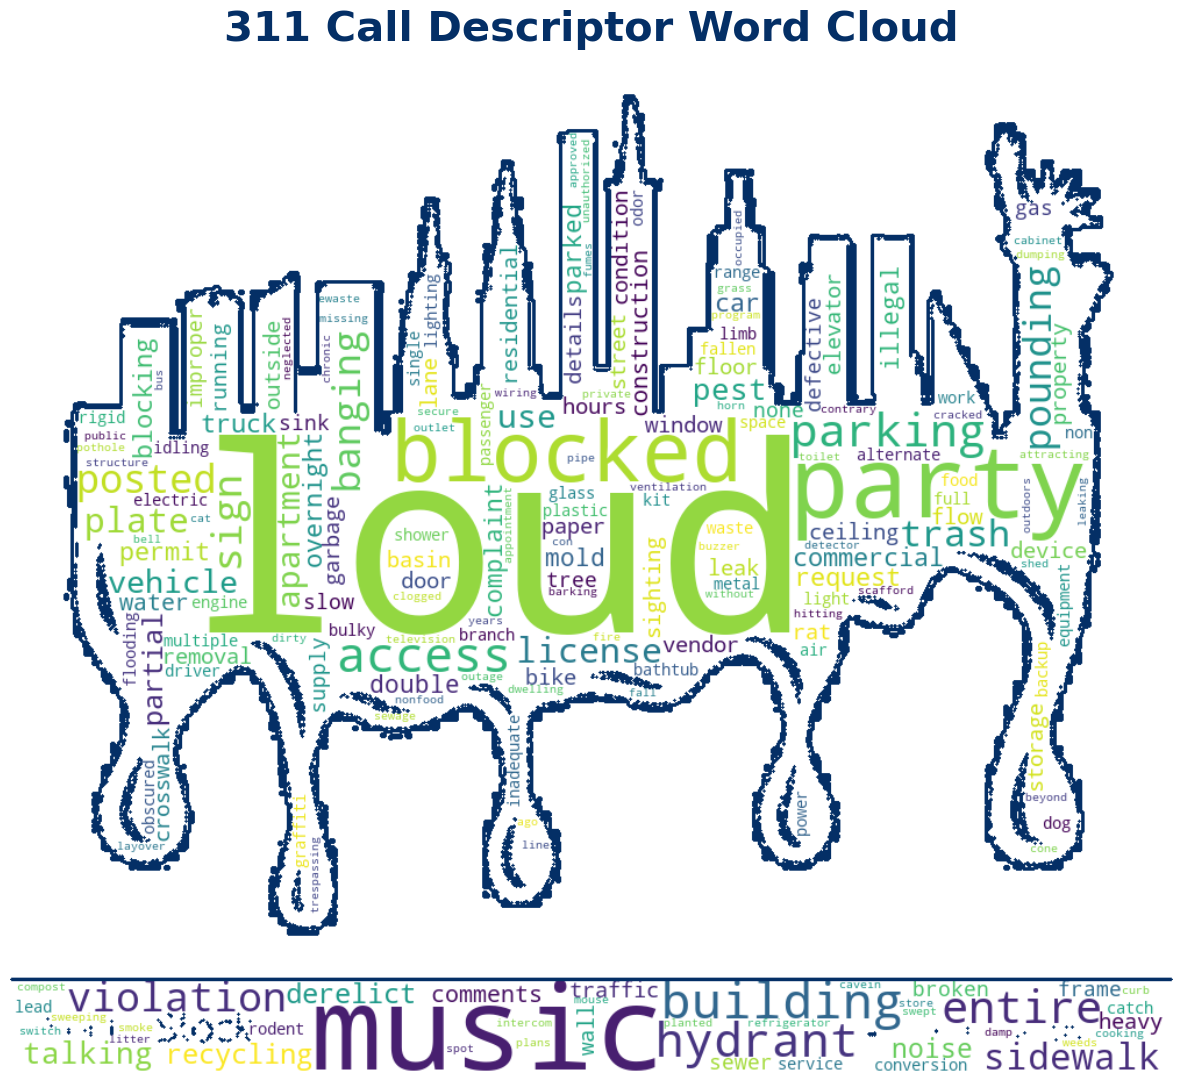

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Your WordCloud configuration
wc = WordCloud(
    background_color="white",
    mask=mask,
    max_words=200,
    max_font_size=500,
    collocations=False,
    contour_width=2,
    contour_color='#042f66'
)

clean_string = ' '.join(clean_descriptor)  # Use a space to separate words

# Generate the WordCloud
wc.generate(clean_string)

# Set up the plot
plt.figure(figsize=(15,17))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Add a title with custom styling
plt.title('311 Call Descriptor Word Cloud', fontdict={'fontsize': 30, 'color': '#042f66', 'weight': 'bold'})

# Show the plot
plt.show()
